In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from matplotlib.pyplot import rcParams

In [6]:
rcParams['figure.figsize']=15,6

In [7]:
data=pd.read_csv('E:\\AirPassengers.csv')

In [8]:
print(data.head())

    Month  #Passengers
0  Jan-49          112
1  Feb-49          118
2  Mar-49          132
3  Apr-49          129
4  May-49          121


In [29]:
data.dtypes

Unnamed: 1     float64
#Passengers      int64
dtype: object

In [33]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m')

In [34]:
data = pd.read_csv('E:\\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [35]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [37]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [40]:
ts = data['#Passengers']

In [41]:
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [42]:
from datetime import datetime

In [43]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [44]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [8]:
ts = data['#Passengers']

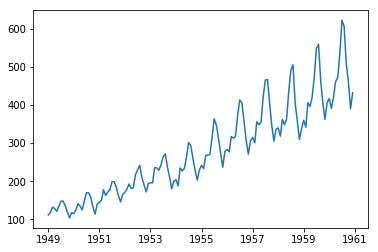

In [17]:
plt.plot(ts)

In [19]:
from statsmodels.tsa.stattools import adfuller

d:\python\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
def test_stationarity(timeseries):
    rolmean=pd.rolling_mean(timeseries,window=12)
    rolstd=pd.rolling_std(timeseries,window=12)
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey_fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critic Value (%s) '%key]=value
    print(dfoutput)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
d:\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


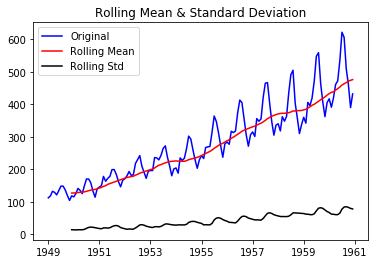

Results of Dickey_fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critic Value (1%)               -3.481682
Critic Value (5%)               -2.884042
Critic Value (10%)              -2.578770
dtype: float64


In [24]:
test_stationarity(ts)

In [27]:
import numpy as np

In [28]:
ts_log=np.log(ts)

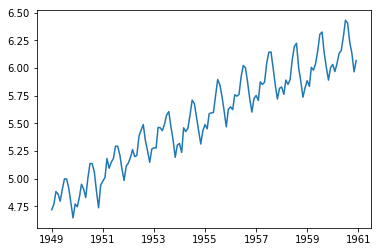

In [29]:
plt.plot(ts_log)

In [30]:
moving_avg=pd.rolling_mean(ts_log,12)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


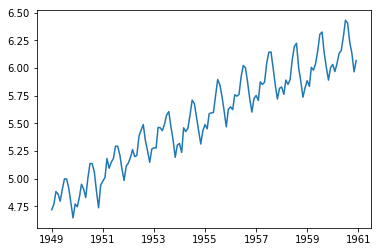

In [31]:
plt.plot(ts_log)

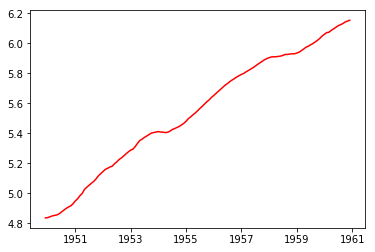

In [32]:
plt.plot(moving_avg,color='red')

ts_log_moving_avg_diff=ts_log-moving_avg

In [33]:
ts_log_moving_avg_diff=ts_log-moving_avg

In [34]:
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [35]:
ts_log_moving_avg_diff.dropna(inplace=True)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
d:\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


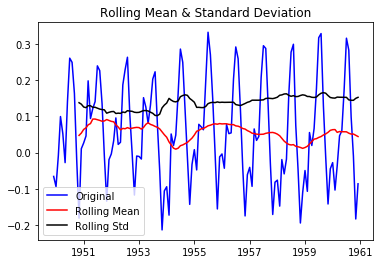

Results of Dickey_fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critic Value (1%)               -3.486535
Critic Value (5%)               -2.886151
Critic Value (10%)              -2.579896
dtype: float64


In [36]:
test_stationarity(ts_log_moving_avg_diff)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


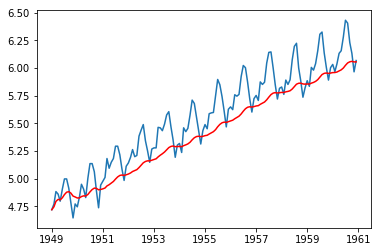

In [37]:
expwighted_avg=pd.ewma(ts_log,halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

d:\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
d:\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


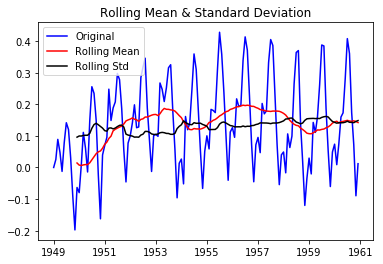

Results of Dickey_fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critic Value (1%)               -3.481682
Critic Value (5%)               -2.884042
Critic Value (10%)              -2.578770
dtype: float64


In [38]:
ts_log_ewma_diff=ts_log-expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [39]:
ts_log_diff=ts_log-ts_log.shift()

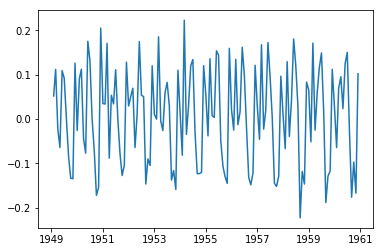

In [40]:
plt.plot(ts_log_diff)

In [41]:
ts_log_diff.dropna(inplace=True)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
d:\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


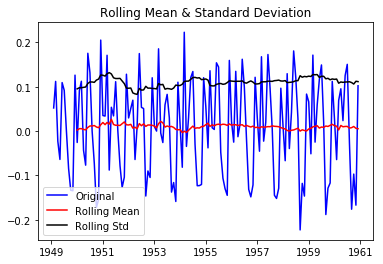

Results of Dickey_fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critic Value (1%)               -3.482501
Critic Value (5%)               -2.884398
Critic Value (10%)              -2.578960
dtype: float64


In [42]:
test_stationarity(ts_log_diff)

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
decomposition=seasonal_decompose(ts_log)

In [45]:
trend=decomposition.trend

In [46]:
seasonal=decomposition.seasonal

In [47]:
residual=decomposition.resid

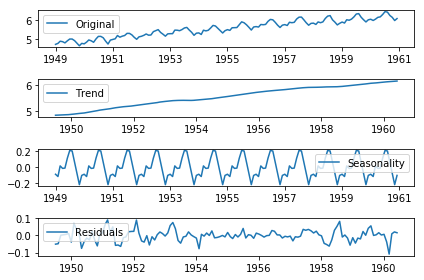

In [50]:
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [51]:
ts_log_decompose=residual

In [52]:
ts_log_decompose.dropna(inplace=True)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
d:\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


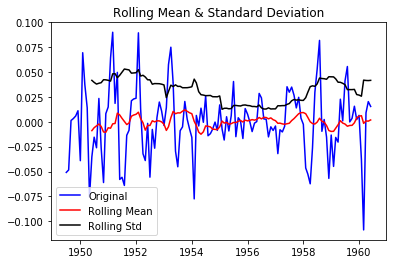

Results of Dickey_fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critic Value (1%)             -3.485122e+00
Critic Value (5%)             -2.885538e+00
Critic Value (10%)            -2.579569e+00
dtype: float64


In [53]:
test_stationarity(ts_log_decompose)

In [54]:
from statsmodels.tsa.stattools import acf,pacf

In [56]:
lag_acf=acf(ts_log_diff,nlags=20)

In [57]:
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')

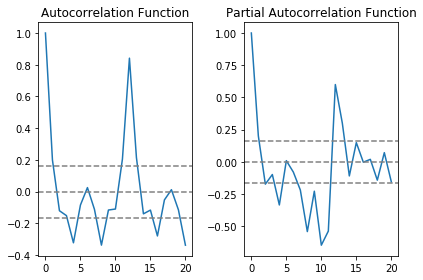

In [58]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [59]:
from statsmodels.tsa.arima_model import ARIMA

d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS:-0.0329')

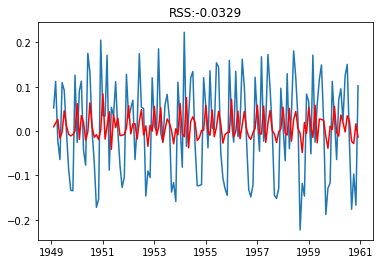

In [60]:
model=ARIMA(ts_log,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)*2))

d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS:1.4721')

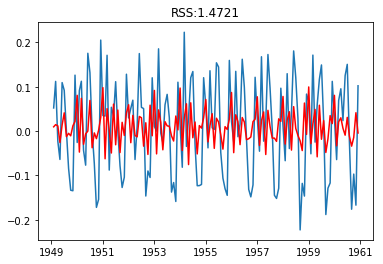

In [61]:
model=ARIMA(ts_log,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
d:\python\python36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS:1.0292')

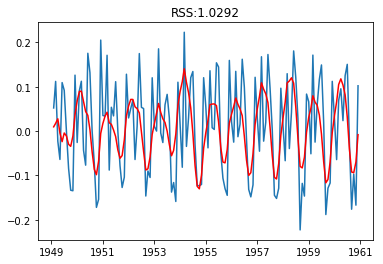

In [62]:
model=ARIMA(ts_log,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [66]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [70]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [71]:
predictions_ARIMA_log=pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

d:\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE:90.1046')

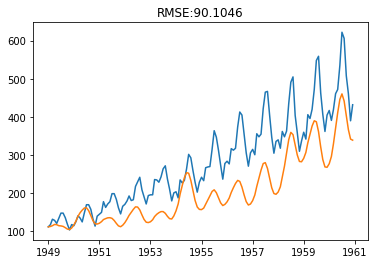

In [72]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE:%.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))